In [1]:
import pandas as pd

In [2]:
import numpy as np

In [11]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic')

In [14]:
df_quest = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_quest.describe().columns

Index(['Unnamed: 0', 'Large Lymphocyte', 'Location of herniation', 'ODI',
       '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부',
       '통증기간(월)', '수술시간', '수술실패여부', '수술일자', '재발여부', '전방디스크높이(mm)',
       '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI',
       'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도', '디스크단면적', '디스크위치',
       '척추전방위증'],
      dtype='object')

### 범주형데이터

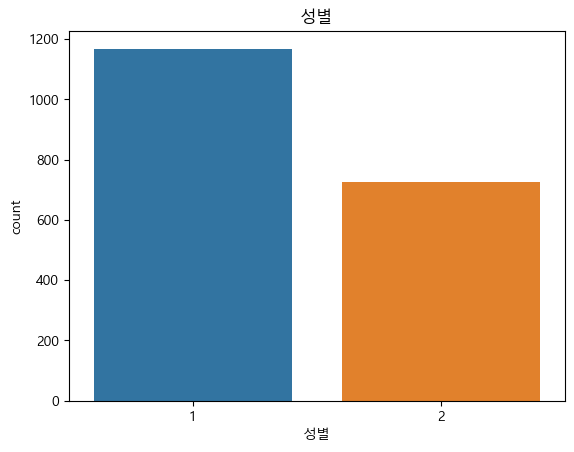

In [15]:
# 성별 차트
sns.countplot(data=df_quest, x= '성별')
plt.title('성별')
plt.show()

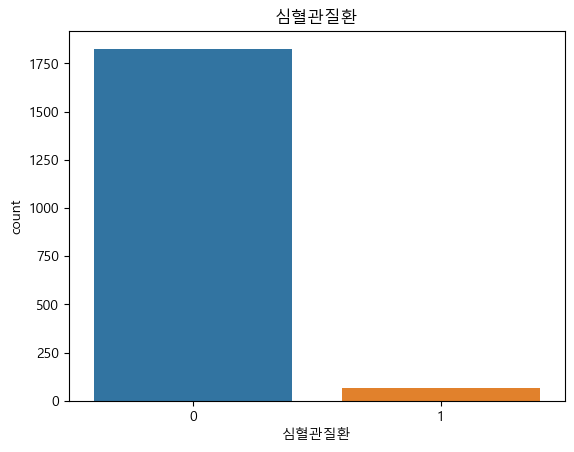

In [17]:
# 심혈관질환 차트
sns.countplot(data=df_quest, x= '심혈관질환')
plt.title('심혈관질환')
plt.show()

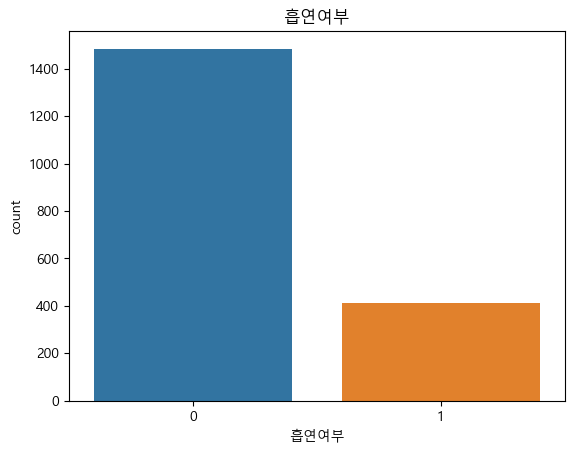

In [19]:
# 흡연여부 차트
sns.countplot(data=df_quest, x= '흡연여부')
plt.title('흡연여부')
plt.show()

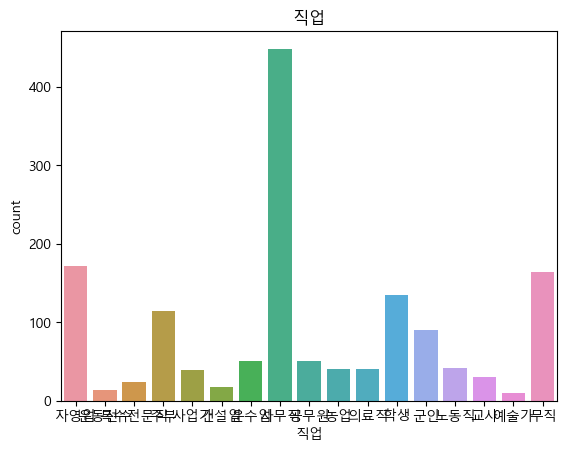

In [21]:
# 직업 차트
sns.countplot(data=df_quest, x= '직업')
plt.title('직업')
plt.show()

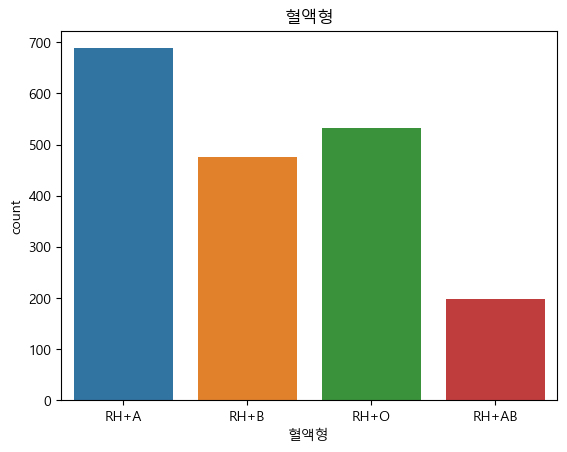

In [22]:
# 혈액형 차트
sns.countplot(data=df_quest, x= '혈액형')
plt.title('혈액형')
plt.show()

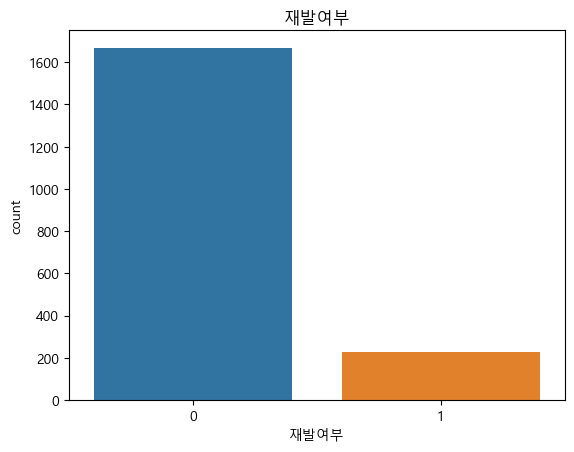

In [23]:
# 재발여부 차트
sns.countplot(data=df_quest, x= '재발여부')
plt.title('재발여부')
plt.show()

### 연속형데이터

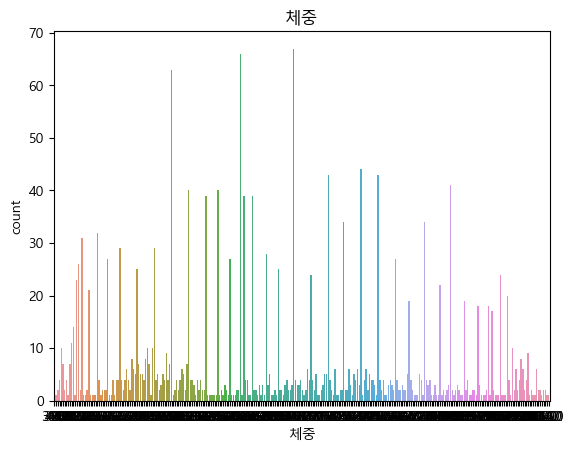

In [18]:
# 체중 차트
sns.countplot(data=df_quest, x= '체중')
plt.title('체중')
plt.show()

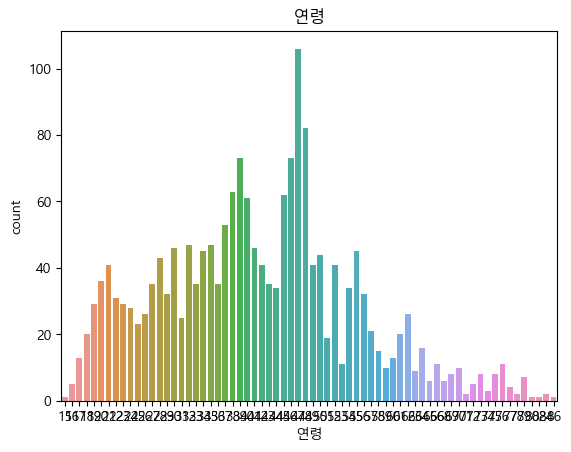

In [20]:
# 연령 차트
sns.countplot(data=df_quest, x= '연령')
plt.title('연령')
plt.show()

## 연속형데이터에서 이상치와 결측치 제거

### 전체 데이터에서 결측치 제거

In [24]:
df_quest_dropna = df_quest.dropna()
df_quest_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 1216
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              162 non-null    int64  
 1   환자ID                    162 non-null    object 
 2   Large Lymphocyte        162 non-null    float64
 3   Location of herniation  162 non-null    int64  
 4   ODI                     162 non-null    float64
 5   가족력                     162 non-null    float64
 6   간질성폐질환                  162 non-null    int64  
 7   고혈압여부                   162 non-null    int64  
 8   과거수술횟수                  162 non-null    int64  
 9   당뇨여부                    162 non-null    int64  
 10  말초동맥질환여부                162 non-null    int64  
 11  빈혈여부                    162 non-null    int64  
 12  성별                      162 non-null    int64  
 13  스테로이드치료                 162 non-null    int64  
 14  신부전여부                   162 non-null    i

### 체중에서 이상치 제거

In [27]:
Q1 = df_quest_dropna['체중'].describe()['25%']
Q3 = df_quest_dropna['체중'].describe()['75%']
IQR = Q3 - Q1

In [28]:
Q1, Q3, IQR

(58.9, 74.45, 15.550000000000004)

In [29]:
bound_up = Q3 + 1.5 * IQR
bound_down = Q1 - 1.5 * IQR
bound_up, bound_down

(97.775, 35.57499999999999)

In [34]:
# filter
condition = (df_quest_dropna['체중'] <= bound_up) & (df_quest_dropna['체중'] >= bound_down)
df_quest_weight = df_quest_dropna[condition]

<function matplotlib.pyplot.show(close=None, block=None)>

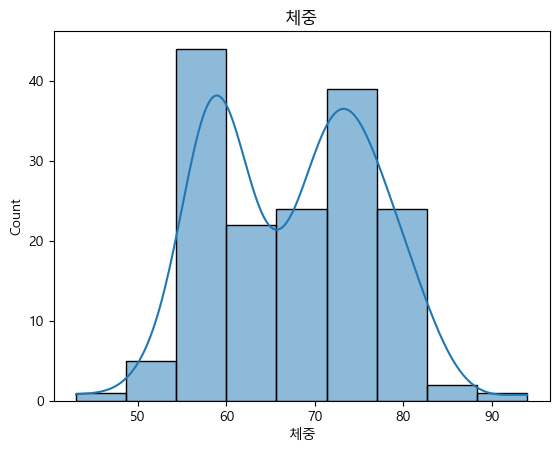

In [35]:
sns.histplot(data=df_quest_weight, x='체중', kde=True)
plt.title('체중')
plt.show

### 연령에서 이상치 제거

In [43]:
age_Q1 = df_quest_dropna['연령'].describe()['25%']
age_Q3 = df_quest_dropna['연령'].describe()['75%']
age_IQR = age_Q3 - age_Q1

In [44]:
age_Q1, age_Q3, age_IQR

(33.0, 46.0, 13.0)

In [45]:
age_bound_up = Q3 + 1.5 * IQR
age_bound_down = Q1 - 1.5 * IQR
age_bound_up, age_bound_down

(65.5, 13.5)

In [46]:
condition = (df_quest_dropna['연령'] <= age_bound_up) & (df_quest_dropna['연령'] >= age_bound_down)
df_quest_age = df_quest_dropna[condition]

<function matplotlib.pyplot.show(close=None, block=None)>

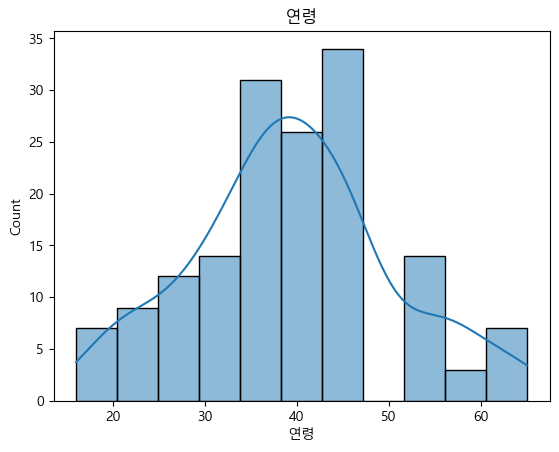

In [47]:
sns.histplot(data=df_quest_age, x='연령', kde=True)
plt.title('연령')
plt.show